In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv('C:/Users/om/Desktop/Capstone project/Churn Modeling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Data preprocessing
# find the null values 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Drop unwanted columns
df=df.drop(['RowNumber','CustomerId','Surname'], axis = 1)


In [8]:
# LAbelEncoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Geography"]=le.fit_transform(df["Geography"])
df["Gender"]=le.fit_transform(df["Gender"])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

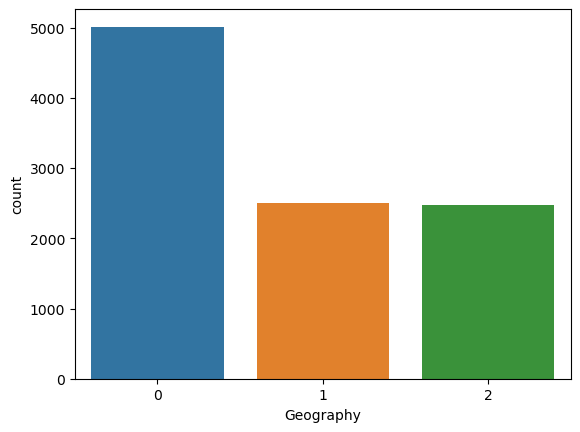

In [10]:
# Categorical Attributes Visualization
sns.countplot(df['Geography'])

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

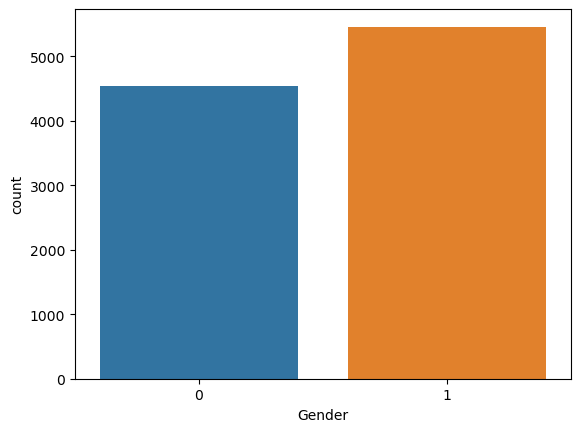

In [11]:
sns.countplot(df['Gender'])

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

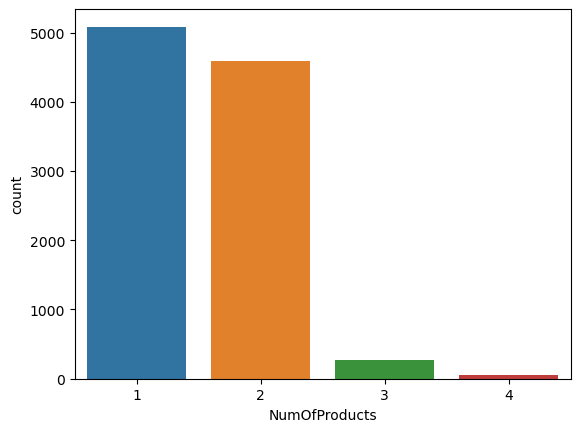

In [12]:
sns.countplot(df['NumOfProducts'])

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

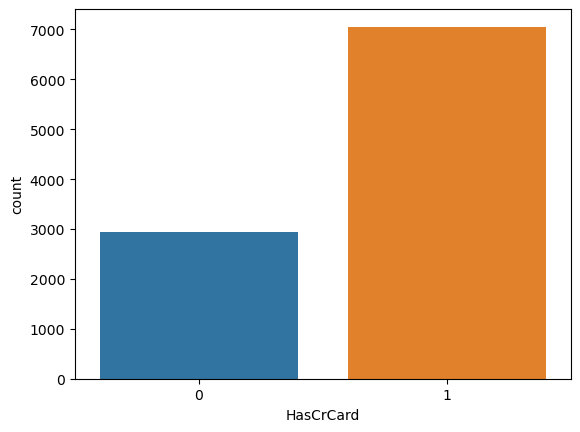

In [13]:
sns.countplot(df['HasCrCard'])

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

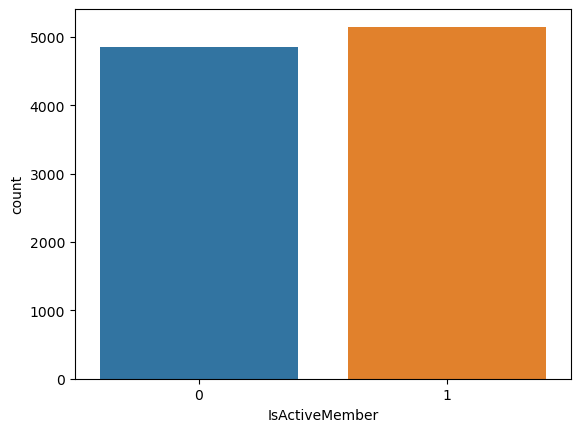

In [14]:
sns.countplot(df['IsActiveMember'])

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

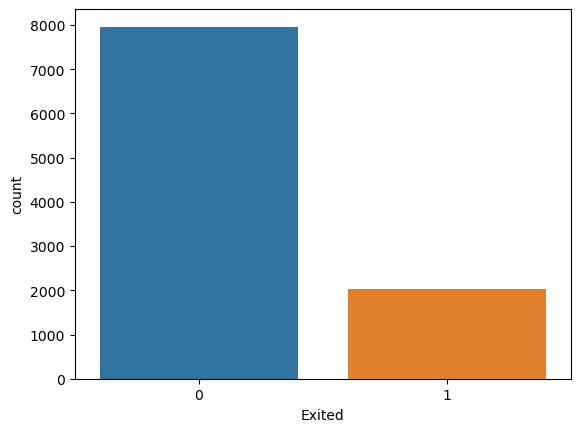

In [15]:
sns.countplot(df['Exited'])

Text(0.5, 1.0, 'Boxplot of EstimatedSalary')

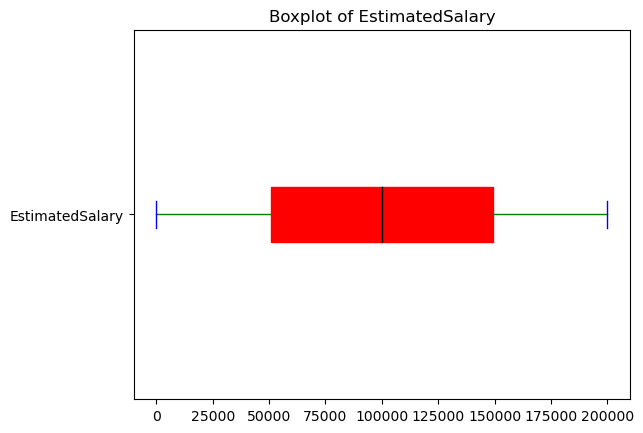

In [16]:
# Numerical attributes Visualization
# # Box plot for EstimatedSalary
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
df.EstimatedSalary.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of EstimatedSalary')



C:\Users\om\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

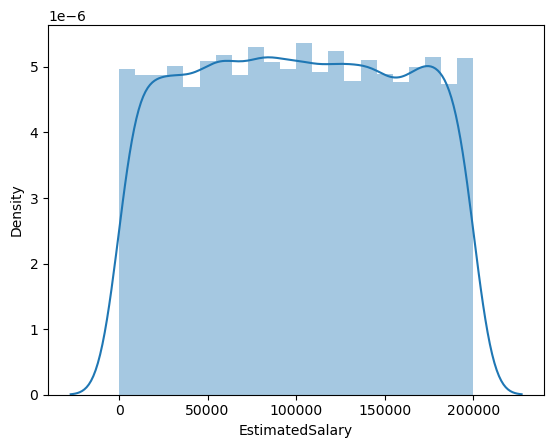

In [17]:
sns.distplot(df['EstimatedSalary'])

In [18]:
from scipy. stats import skew
print(skew(df['EstimatedSalary']))

0.0020850448448748848


Text(0.5, 1.0, 'Boxplot of Balance')

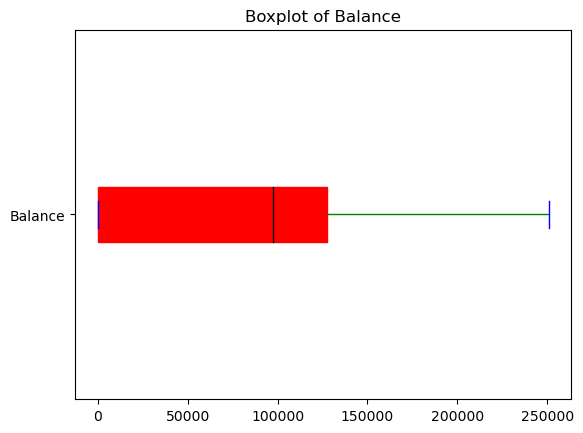

In [19]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
df.Balance.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of Balance')

In [20]:
# Data slicing
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [21]:
x

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [22]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [23]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


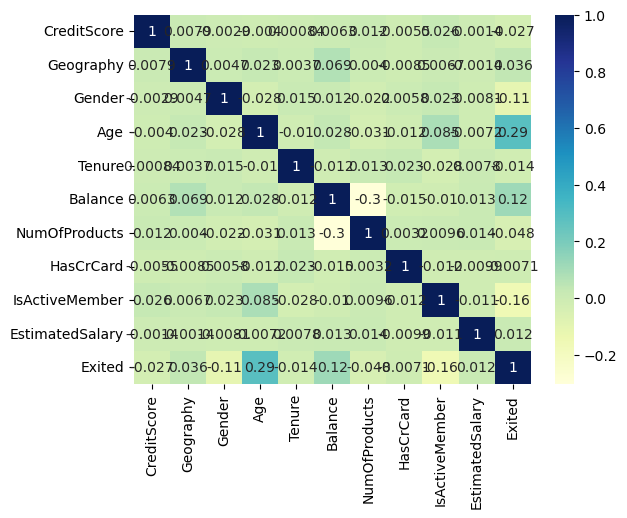

In [24]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [25]:

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=123)

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test =ss.transform(x_test)

In [27]:
x_train

array([[-1.25158147, -0.90374523,  0.90990702, ...,  0.64738759,
         0.97212178,  1.59050278],
       [ 0.19694592, -0.90374523,  0.90990702, ...,  0.64738759,
         0.97212178,  0.66550404],
       [-0.28934542, -0.90374523,  0.90990702, ...,  0.64738759,
         0.97212178,  0.92778608],
       ...,
       [ 0.36249191, -0.90374523,  0.90990702, ...,  0.64738759,
        -1.02867771, -1.06290325],
       [-0.07206631, -0.90374523,  0.90990702, ...,  0.64738759,
         0.97212178,  1.14288158],
       [ 0.37283854, -0.90374523,  0.90990702, ...,  0.64738759,
        -1.02867771, -1.58209776]])

In [28]:
x_test

array([[ 1.33507459,  1.51010422, -1.09901339, ..., -1.54466971,
         0.97212178,  0.20550176],
       [ 1.01432924, -0.90374523, -1.09901339, ..., -1.54466971,
         0.97212178,  1.44588311],
       [ 0.01070669, -0.90374523,  0.90990702, ...,  0.64738759,
         0.97212178, -0.43733137],
       ...,
       [ 0.2279858 , -0.90374523, -1.09901339, ...,  0.64738759,
         0.97212178,  0.64403344],
       [-0.39281166,  1.51010422,  0.90990702, ...,  0.64738759,
        -1.02867771, -1.57936406],
       [ 1.70755306,  0.30317949, -1.09901339, ...,  0.64738759,
         0.97212178,  0.62945027]])

In [29]:
x_train.shape

(7500, 10)

In [30]:
 # part 2 now lets create ANN
!pip install tensorflow==2.11.*

In [31]:
import tensorflow as tf

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [33]:
# Lets initialize the ANN
classifier=Sequential()


In [34]:
# Adding the input layer
classifier.add(Dense(units=11,activation = 'relu'))

In [35]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))


In [36]:
# adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [37]:
# Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [38]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
# Early stopping _It makes sure when the accuracy is not increasing it will automatically stop
#Stop training when a monitored metric has stopped improving.
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [40]:
# here we have used early_stopping.It will stop automatically whenever the accuracy remains almost constant
model_history =classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
503/503 [==============================] - 4s 4ms/step - loss: 0.5910 - accuracy: 0.7307 - val_loss: 0.4910 - val_accuracy: 0.7884
Epoch 2/100
503/503 [==============================] - 2s 4ms/step - loss: 0.4500 - accuracy: 0.8067 - val_loss: 0.4440 - val_accuracy: 0.7964
Epoch 3/100
503/503 [==============================] - 2s 4ms/step - loss: 0.4227 - accuracy: 0.8167 - val_loss: 0.4312 - val_accuracy: 0.8013
Epoch 4/100
503/503 [==============================] - 2s 4ms/step - loss: 0.4121 - accuracy: 0.8232 - val_loss: 0.4178 - val_accuracy: 0.8122
Epoch 5/100
503/503 [==============================] - 2s 3ms/step - loss: 0.4009 - accuracy: 0.8310 - val_loss: 0.4062 - val_accuracy: 0.8235
Epoch 6/100
503/503 [==============================] - 2s 4ms/step - loss: 0.3899 - accuracy: 0.8366 - val_loss: 0.3966 - val_accuracy: 0.8292
Epoch 7/100
503/503 [==============================] - 2s 3ms/step - loss: 0.3803 - accuracy: 0.8439 - val_loss: 0.3877 - val_accuracy: 0.8356

Epoch 58/100
503/503 [==============================] - 2s 4ms/step - loss: 0.3226 - accuracy: 0.8670 - val_loss: 0.3640 - val_accuracy: 0.8510
Epoch 59/100
503/503 [==============================] - 2s 4ms/step - loss: 0.3230 - accuracy: 0.8676 - val_loss: 0.3654 - val_accuracy: 0.8489
Epoch 59: early stopping


In [41]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

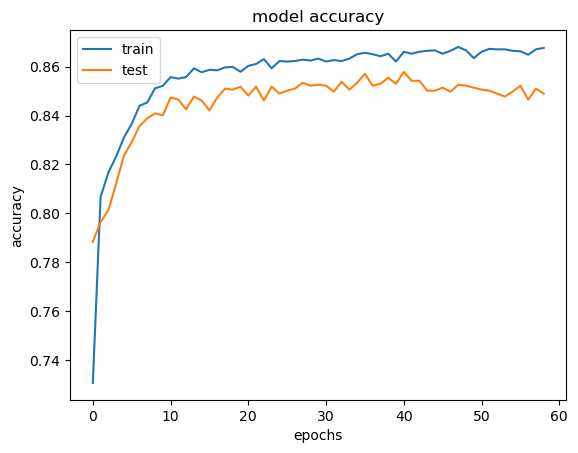

In [42]:
# Summarize the history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [43]:
import matplotlib.pyplot as plt

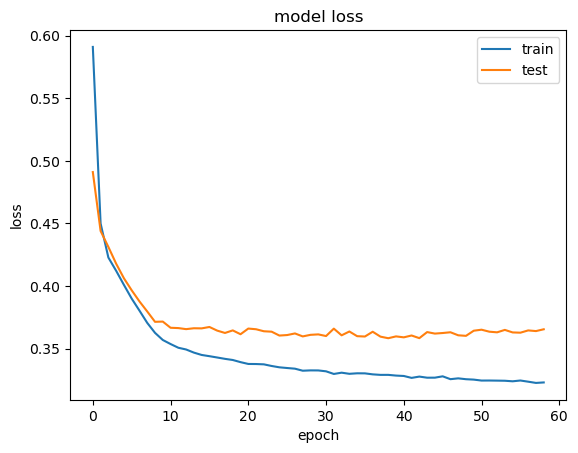

In [44]:
# Model loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc = 'upper right')